In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

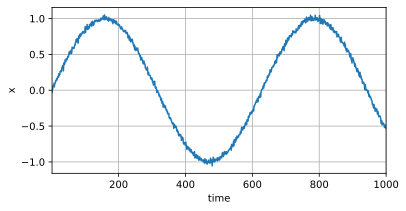

In [5]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.02, (T, ))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [7]:
tau = 4
features = torch.zeros((T - tau), tau)
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau: ].reshape(-1, 1)

In [9]:
batch_size = 16
n_train = 600
train_iter = d2l.load_array((features[: n_train], labels[: n_train]), batch_size, is_train=True)

In [11]:
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10), 
                        nn.ReLU(), 
                        nn.Linear(10, 1))
    net.apply(init_weight)
    return net

loss = nn.MSELoss(reduction='none')

In [12]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward() #单个样本误差求和
            trainer.step() #利用梯度更新参数
        print(f'epoch{epoch + 1},'
              f'loss{d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch1,loss0.012882
epoch2,loss0.005926
epoch3,loss0.003908
epoch4,loss0.002653
epoch5,loss0.001898


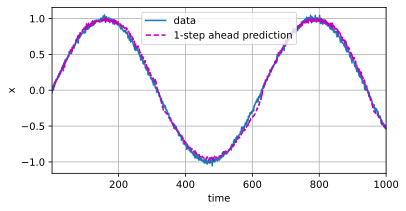

In [13]:
onestep_pred = net(features)
d2l.plot([time, time[tau: ]], [x.detach().numpy(), onestep_pred.detach().numpy()], 'time', 'x',
          legend=['data', '1-step ahead prediction'], xlim=[1, 1000], figsize=(6, 3))

In [16]:
help(d2l.plot)

Help on function plot in module d2l.torch:

plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None)
    Plot data points.
    
    Defined in :numref:`sec_calculus`

